### Load Libraries 

In [1]:
import pandas as pd
import numpy as np

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Import Dataframe

In [4]:
df1 = pd.read_excel("additional_data.xlsx")

df2 = pd.read_excel("performance_data.xlsx")

df3 = pd.read_excel("customer_data.xlsx")

In [5]:
df1.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [6]:
df2.head()

,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [7]:
df3.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No


In [9]:
print("Rows and Columns: ", df1.shape)
print("Rows and Columns: ", df2.shape)
print("Rows and Columns: ", df3.shape)

Rows and Columns:  (20, 16)
Rows and Columns:  (80, 4)
Rows and Columns:  (81, 12)


In [11]:
df2.CustomerID

0     C001
1     C002
2     C003
3     C004
4     C005
      ... 
75    C076
76    C077
77    C078
78    C079
79    C080
Name: CustomerID, Length: 80, dtype: object

In [14]:
merged_df = pd.merge(df3, df2, on='CustomerID', how='inner')

In [15]:
merged_df

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1


**Check Missing Values**

In [21]:
missing_value = merged_df.isnull().sum()

missing_value

CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
Recency                     0
Frequency_Score             0
Monetary_Score              0
dtype: int64

***Arrange those missing value***

In [18]:
merged_df.isnull().sum().sort_values(ascending = False)

Income                      5
City                        3
CustomerID                  0
Gender                      0
Age                         0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
Recency                     0
Frequency_Score             0
Monetary_Score              0
dtype: int64

In [20]:
merged_df[["Income", "City"]]

,Income,City
0,72504.0,Chicago
1,40881.0,New York
2,63333.0,New York
3,58030.0,Chicago
4,78889.0,Houston
...,...,...
76,59659.0,Houston
77,94266.0,Los Angeles
78,76887.0,Houston
79,56569.0,New York


***Check values and their counts***

In [30]:
merged_df.City.unique()

array(['Chicago', 'New York', 'Houston', 'Los Angeles', nan], dtype=object)

In [31]:
merged_df.City.value_counts()

Houston        24
Los Angeles    23
New York       17
Chicago        14
Name: City, dtype: int64

In [47]:
merged_df["City"].mode()

0    Houston
Name: City, dtype: object

**Create Hisplot to Check/Visualize most frequent**

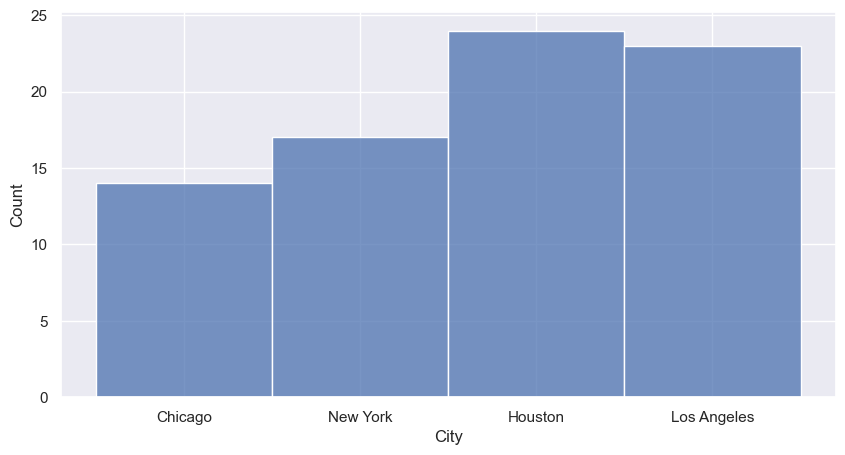

In [26]:
for i in merged_df[["City"]]:
    plt.figure(figsize=(10,5))
    sns.histplot(merged_df[i])
    plt.show()

In [35]:
merged_df[["Income"]].describe()

,Income
count,76.000000
mean,59156.657895
std,19820.597168
min,15531.000000
25%,44810.750000
50%,58033.000000
75%,73236.500000
max,107662.000000


### Fill Missing Values by using importing SimpleImputer

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
# use mean or median for numerical data

imputer = SimpleImputer(strategy='mean')

In [38]:
imputer.fit(merged_df[["Income"]])

SimpleImputer()

In [39]:
merged_df[["Income"]] = imputer.transform(merged_df[["Income"]])

In [41]:
merged_df[["Income"]].isnull().sum()

Income    0
dtype: int64

In [42]:
# use most frquent for categorical data

imputer = SimpleImputer(strategy='most_frequent')

In [43]:
imputer.fit(merged_df[["City"]])

SimpleImputer(strategy='most_frequent')

In [44]:
merged_df[["City"]] = imputer.transform(merged_df[["City"]])

In [45]:
merged_df[["City"]].isnull().sum()

City    0
dtype: int64

In [46]:
merged_df.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
Recency                     0
Frequency_Score             0
Monetary_Score              0
dtype: int64

- Now ,there is no missing value

### Check DataTypes

In [48]:
merged_df.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
Recency                       int64
Frequency_Score               int64
Monetary_Score                int64
dtype: object

In [67]:
unique_values = data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

In [ ]:
- 

In [70]:
merged_df[merged_df['Customer_Lifespan_Months'] != 'inconsistent_value']

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1


In [64]:
merged_df['Customer_Lifespan_Months'].dtypes

dtype('O')

In [65]:
merged_df['Customer_Lifespan_Months'] = merged_df['Customer_Lifespan_Months'].astype(int)

ValueError: invalid literal for int() with base 10: 'XXXX'

In [76]:
merged_df = merged_df[merged_df['Customer_Lifespan_Months'] != 'xxxx']


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,XXXX,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1


In [77]:
merged_df['Customer_Lifespan_Months'] = pd.to_numeric(data['Customer_Lifespan_Months'], errors='coerce')


In [80]:
merged_df

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3.0,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4.0,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1.0,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1.0,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1.0,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4.0,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,NaN,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2.0,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3.0,In-store,2022-12-08,Yes,1,1,1


In [81]:
merged_df['Customer_Lifespan_Months'].fillna(merged_df['Customer_Lifespan_Months'].median(), inplace=True)


In [82]:
merged_df

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3.0,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4.0,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,4.125200e+01,1.0,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1.0,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1.0,Online,2022-09-23,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4.0,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,3.0,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2.0,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3.0,In-store,2022-12-08,Yes,1,1,1


In [87]:
merged_df['Customer_Lifespan_Months'].dtypes

dtype('float64')

In [88]:
merged_df['Customer_Lifespan_Months'].nunique

<bound method IndexOpsMixin.nunique of 0     3.0
1     4.0
2     1.0
3     1.0
4     1.0
     ... 
76    4.0
77    3.0
78    2.0
79    3.0
80    2.0
Name: Customer_Lifespan_Months, Length: 81, dtype: float64>

In [89]:
merged_df['Customer_Lifespan_Months'] = merged_df['Customer_Lifespan_Months'].astype(int)

In [95]:
unique_values = merged_df['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5])

In [96]:
merged_df['Date_of_Purchase'].dtypes

dtype('O')

In [97]:
unique_values = merged_df['Date_of_Purchase'].unique()
unique_values

array(['2022-03-05', '2023-07-08', '2023-01-30', '2023-06-01',
       '2022-09-23', '2022-11-30', '2023-07-20', '2022-05-24',
       '2022-09-02', '2023-10-03', '2023-07-16', '2023-04-29',
       '2023-02-13', '2023-05-21', '2023-03-30', '2022-01-02',
       '2022-04-22', '2022-03-06', '2023-07-19', '2022-04-08',
       '2023-06-08', '2023-12-24', '2023-07-15', '2023-07-11',
       '2022-04-04', '2023-02-19', '2022-05-08', '2022-04-06',
       '2023-04-04', '2022-11-05', '2022-08-16', '2023-08-05',
       '2023-06-30', '2023-06-05', '2022-09-14', '2022-08-12',
       '2023-12-02', '2023-03-07', '2022-10-26', '2022-05-31',
       '2022-05-26', '2022-07-15', '2023-05-17', '2023-03-21',
       '2022-12-29', '2022-12-07', '2023-09-19', '2022-12-05',
       '2022-11-24', '2022-03-17', '2022-09-24', '2022-05-23',
       '2023-12-29', '2023-09-26', '2022-11-07', '2022-02-11',
       '2023-10-18', '2022-04-12', '2022-04-14', '2022-10-16',
       '2022-07-28', '2023-09-09', '2023-06-18', '2023-

In [98]:
merged_df['Date_of_Purchase'] = pd.to_datetime(merged_df['Date_of_Purchase'], errors='coerce')  


In [99]:
merged_df['Date_of_Purchase'].dtypes

dtype('<M8[ns]')

In [100]:
print(merged_df['Date_of_Purchase'].dtypes)


datetime64[ns]


------------------------

### Sort Values

In [109]:
sorted_data = merged_df.sort_values(by='Income', ascending = False)
sorted_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
56,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No,4,4,4
23,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes,3,3,3
71,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes,2,2,2
33,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No,3,2,2
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,63.082,3,Online,2023-01-02,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No,1,1,1
50,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No,3,3,3
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes,2,2,2
24,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes,1,2,2


### Filtering Conditional operator

In [101]:
filtered_data = merged_df[merged_df['Age'] > 25]
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
3,C004,Male,34,58030.0,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,5.276300e+01,1,Online,2022-09-23,No,1,1,1
5,C006,Male,52,76470.0,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,C076,Male,44,59659.0,Houston,Midwest,14,1.345400e+02,4,Online,2023-12-25,Yes,4,4,4
77,C077,Female,38,94266.0,Los Angeles,Midwest,5,6.308200e+01,3,Online,2023-01-02,No,1,1,1
78,C078,Male,30,76887.0,Houston,Midwest,7,8.081600e+01,2,Online,2022-11-14,No,4,4,3
79,C079,Female,42,56569.0,New York,West,11,1.342341e+07,3,In-store,2022-12-08,Yes,1,1,1


### Query Function

In [106]:
filtered_data = merged_df.query('Age == 30')
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
4,C005,Male,30,78889.000000,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1
29,C029,Female,30,59513.000000,Los Angeles,West,12,127.165,3,Online,2023-04-04,Yes,3,3,3
64,C064,Male,30,59156.657895,Houston,West,10,107.919,3,In-store,2023-11-16,Yes,1,1,1
78,C078,Male,30,76887.000000,Houston,Midwest,7,80.816,2,Online,2022-11-14,No,4,4,3


### Filtering Data using isin Function

In [126]:
filtered_data = merged_df[merged_df['City'].isin(['New York', 'Chicago'])]
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.000000,Chicago,Northeast,10,9.824100e+01,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.000000,New York,West,15,1.576400e+02,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.000000,New York,Northeast,1,4.125200e+01,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.000000,Chicago,Midwest,6,6.732900e+01,1,In-store,2023-06-01,No,2,2,2
5,C006,Male,52,76470.000000,Chicago,Midwest,11,1.170120e+02,3,Online,2022-11-30,Yes,3,3,3
9,C010,Female,47,65341.000000,New York,Northeast,10,1.081480e+02,3,In-store,2023-10-03,Yes,4,4,4
12,C013,Female,24,45208.000000,Chicago,West,10,1.034760e+02,3,Online,2023-02-13,Yes,1,1,1
13,C014,Female,38,70465.000000,Chicago,Midwest,11,1.111940e+02,3,Online,2023-05-21,Yes,4,4,4
14,C015,Male,44,32500.000000,New York,Northeast,9,9.647300e+01,3,Online,2023-03-30,No,1,1,1
16,C017,Female,26,75726.000000,New York,West,13,1.319270e+02,4,In-store,2022-04-22,Yes,1,1,1


In [124]:
merged_df['City']

0         Chicago
1        New York
2        New York
3         Chicago
4         Houston
         ...     
76        Houston
77    Los Angeles
78        Houston
79       New York
80    Los Angeles
Name: City, Length: 81, dtype: object

### Loc & iLoc

In [ ]:
data.loc[range_of_rows, range_of_cols_names]

In [ ]:
data.iloc[range_of_rows, range_of_cols]

### Filter Data by OR | AND & Condition

In [118]:
filtered_data = merged_df[(merged_df['Age']<20) | (merged_df['Age']<30)]
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
12,C013,Female,24,45208.0,Chicago,West,10,103.476,3,Online,2023-02-13,Yes,1,1,1
16,C017,Female,26,75726.0,New York,West,13,131.927,4,In-store,2022-04-22,Yes,1,1,1
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No,4,4,4
20,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No,1,2,2
21,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No,1,2,2
22,C022,Male,26,78988.0,Chicago,Midwest,7,76.826,2,In-store,2023-12-24,No,3,3,2
25,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes,4,4,4
26,C026,Female,18,33681.0,Los Angeles,Midwest,5,58.264,1,Online,2023-02-19,No,3,3,3
31,C031,Female,22,81993.0,Chicago,Midwest,12,121.402,3,Online,2022-08-16,Yes,2,2,2


In [120]:
filtered_data = merged_df[(merged_df['Age']>20) & (merged_df['Age']<30)]
filtered_data

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
12,C013,Female,24,45208.0,Chicago,West,10,103.476,3,Online,2023-02-13,Yes,1,1,1
16,C017,Female,26,75726.0,New York,West,13,131.927,4,In-store,2022-04-22,Yes,1,1,1
19,C020,Male,28,37050.0,Los Angeles,Midwest,6,71.789,2,Online,2022-04-08,No,4,4,4
20,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No,1,2,2
21,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No,1,2,2
22,C022,Male,26,78988.0,Chicago,Midwest,7,76.826,2,In-store,2023-12-24,No,3,3,2
25,C025,Male,27,45239.0,Los Angeles,West,12,127.888,3,In-store,2022-04-04,Yes,4,4,4
31,C031,Female,22,81993.0,Chicago,Midwest,12,121.402,3,Online,2022-08-16,Yes,2,2,2
32,C032,Female,21,55212.0,Los Angeles,Midwest,12,120.921,3,Online,2023-08-05,Yes,4,4,4
35,C035,Male,28,50039.0,New York,West,7,75.568,2,Online,2022-09-14,No,2,2,2
